# CTセンサーで測定した交流電流データの解析

In [60]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline

In [61]:
df = pd.read_csv("./csv/DeskLamp_32W_white.csv", names=["voltage", "current"])
df.describe()

,voltage,current
count,6000.000000,6000.000000
mean,-41.146500,-0.013715
std,578.333356,0.192778
min,-2048.000000,-0.682667
25%,-81.000000,-0.027000
50%,-54.500000,-0.018167
75%,-14.000000,-0.004667
max,1733.000000,0.577667


### RMS(Root Mean Square; 平均二乗根)を求める

In [62]:
def rms(nums):
    powered_nums = np.power(nums, 2)
    rms = np.sqrt(np.sum(powered_nums) / len(nums))
    return rms

df_rms = rms(df)
voltage_rms = rms(df.voltage)
current_rms = rms(df.current)
print(df_rms)
print("Voltage_rms : {}, \nCurrent_rms : {}".format(voltage_rms, current_rms))

voltage    579.747152
current      0.193249
dtype: float64
Voltage_rms : 579.7471522137905, 
Current_rms : 0.19324905073793017


### 値の散らばりを表示

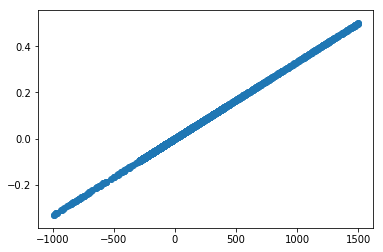

In [99]:
plot_range = 1000
current = df.query("voltage > -1000 & voltage < 1500")
# plt.scatter(df.voltage[0:plot_range], df.current[0:plot_range])
plt.scatter(current.voltage, current.current)

### 測定値の波形表示
- CTセンサーで測定した交流電流の波形を表示する

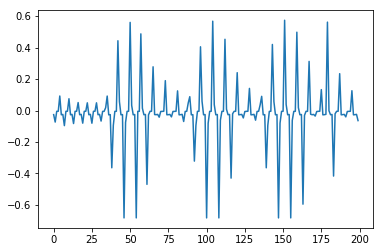

In [100]:
plot_range = 200
plt.plot(range(len(df[0:plot_range])), df.current[0:plot_range])

### 電流値の表示
- 過渡特性っぽいものが出てる
- 測定結果として有用なのは3000サンプル以上となりそう

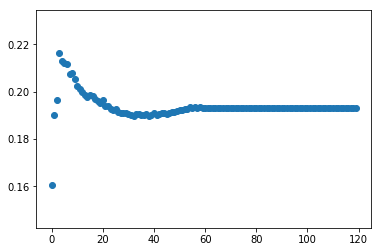

In [126]:
rms_samples = []
watt_samples = []
for i in range(int(len(df)/50)):
    rms_samples.append(rms(df.current[0:(i+1)*100]))
    watt_samples.append(rms(df.current[0:(i+1)*100]) * 141.1)
plt.scatter(range(len(rms_samples)), rms_samples)

### 電力値の表示（V=141.1[V])
- 過渡特性っぽいのが出ている
- 測定結果として有用なのは3000サンプル以上となりそう

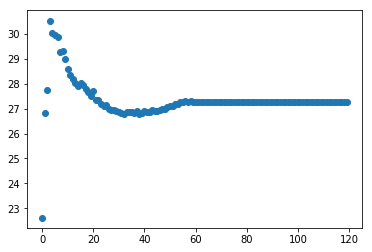

In [127]:
plt.scatter(range(len(watt_samples)), watt_samples)